# Задание 1

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

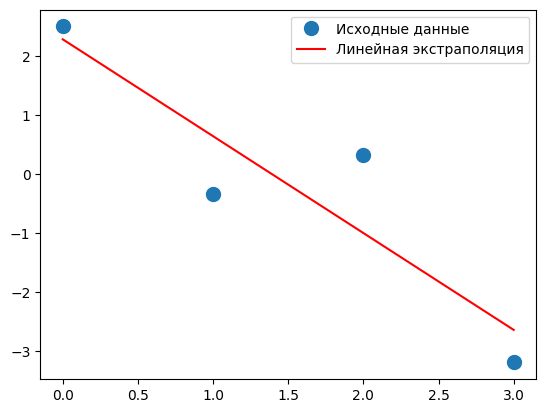

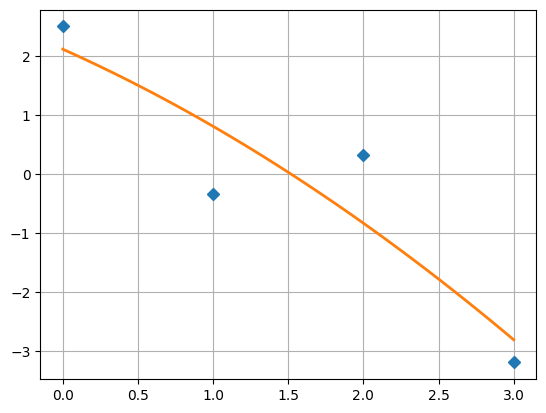

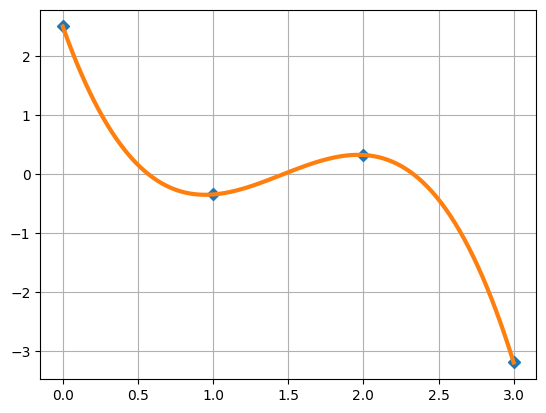

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Степень полинома

x = np.array([0, 1, 2, 3])
y = np.array([2.5, -0.35, 0.32, -3.2])

# Перепишем лин. ур-е y = kx + b как y = Ap, где A = [[ x 1 ]] и p = [[k], [b]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T

# Используем метод lstsq для решения его относительно вектора p.
k, b = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, k * x + b, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

# 2 Степень полинома

# Нахождение коэф-ов ф-ии вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = np.vstack((x ** 2, x, np.ones(len(x)))).T

# находим коэф-ы при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# Отрезок [0,3]
x_prec = np.linspace(0, 3, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.show()

# 3 Степеь полинома

# Нахождение коэф-ов ф-ии вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x**2, x, E]
m = np.vstack((x ** 3, x ** 2, x, np.ones(len(x)))).T

# находим коэ-фы при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# Орезок [0,3]
x_prec = np.linspace(0, 3, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.show()

# Задание 2

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

Линейное отклонение 0.00126462925623483
Квадратичное отклонение 0.12751693265116948


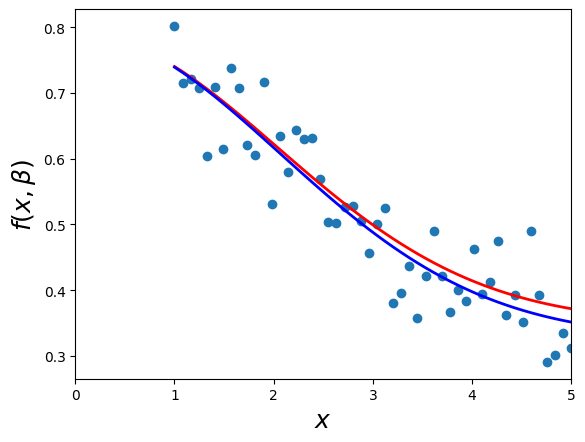

Линейное отклонение 0.00032416025994507375
Квадратичное отклонение 0.1461407537419934


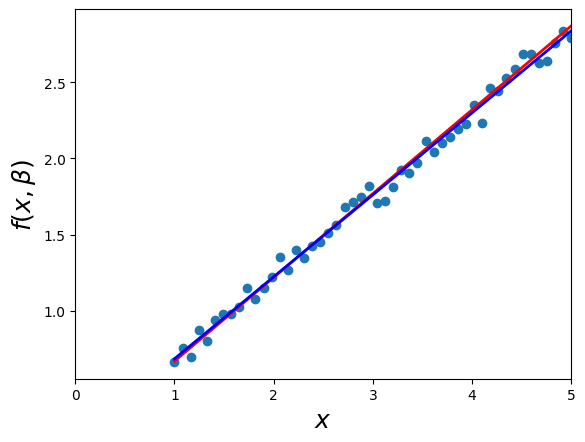

Линейное отклонение 0.0006771665327398688
Квадратичное отклонение 0.08721774206971168


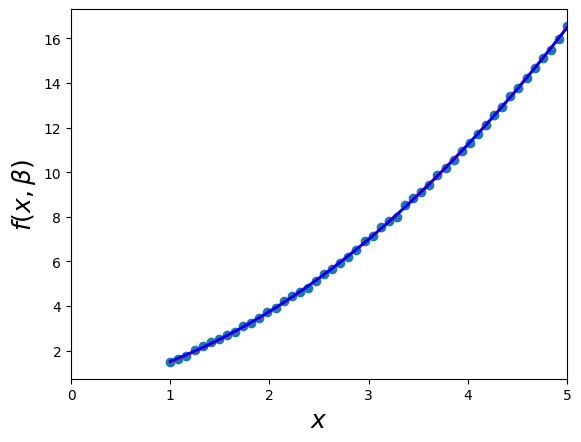

Линейное отклонение 7.125673722965347e-05
Квадратичное отклонение 0.16477702275589065


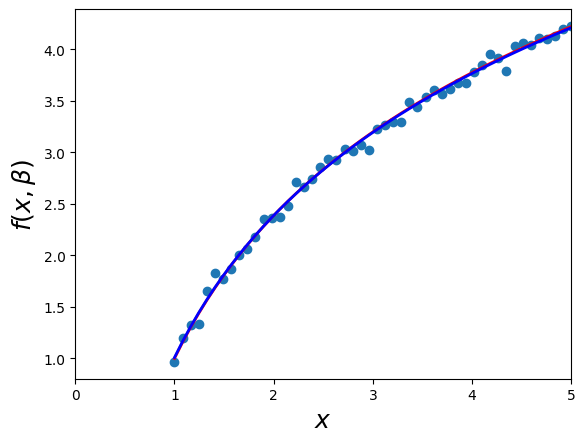

Линейное отклонение 0.00011851235757103554
Квадратичное отклонение 0.13216375982000983


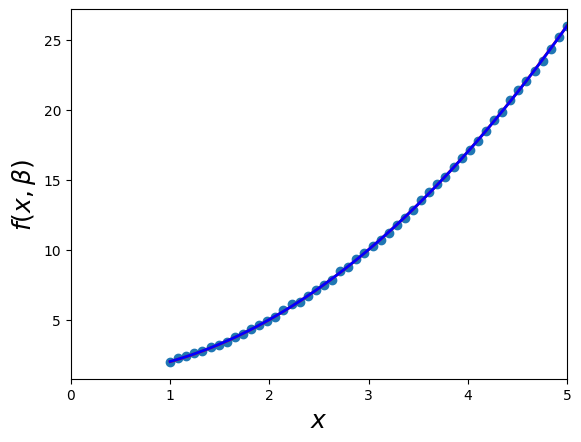

In [43]:
# 1) f(x,b) = b_0  + b_1 exp(-b2x^2)
# 2) f(x,b) = b_0  + b_1 x 
# 3) f(x,b) = b_0  + b_1 x + b_2 x^2 
# 4) f(x,b) = b_0  + b_1 ln(x) 
# 5) f(x,b) = b_0   x^(b_1 )  

def calculate(f, beta):
    # зададим массив точек xi
    xdata = np.linspace(1, 5, 50)

    # создаем теоретически правильные значения точек yi (без шума)
    y = f(xdata, *beta)

    # зашумляем эти данные
    ydata = y + 0.05 * np.random.randn(len(xdata))

    # Используем ф-ю для получения решения в виде коэф-ов ф-ии f(x) для указаных xdata и ydata
    from scipy.optimize import curve_fit
    beta_opt, beta_cov = curve_fit(f, xdata, ydata)

    # Вычислим линейное отклонение
    lin_dev = sum(beta_cov[0])
    print('Линейное отклонение', lin_dev)

    # Вычислим квадратичное отклонение
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals**2)
    print('Квадратичное отклонение', fres)

    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2)
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
    plt.show()


def f1(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

def f2(x, b0, b1):
    return b0 + b1 * x

def f3(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

def f4(x, b0, b1):
    return b0 + b1 * np.log(x)

def f5(x, b0, b1):
    return b0 + x**b1

def main():
    beta1 = (0.35, 0.44, 0.12)
    beta2 = (0.12, 0.55)
    beta3 = (0.25, 0.75, 0.5)
    beta4 = (1, 2)
    beta5 = (1, 2)

    
    calculate(f1, beta1)
    calculate(f2, beta2)
    calculate(f3, beta3)
    calculate(f4, beta4)
    calculate(f5, beta5)
    

if __name__ == "__main__":
    main()

# Задание 3

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [3]:
print('3')

3


# Задание 4

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

In [4]:
print('4')

4


# Задание 5

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.


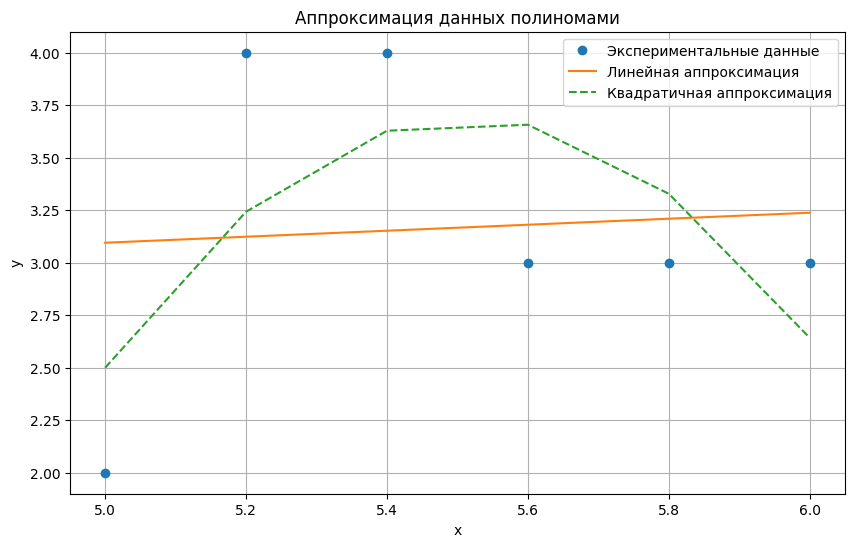

(array([0.14285714, 2.38095238]),
 array([  -4.46428571,   49.25      , -132.14285714]))

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Вариант 5
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0, 3.0])

# Полином первой степени (линейный)
coefs_lin = np.polyfit(x, y, 1)
polynomial_lin = Polynomial(coefs_lin[::-1])

# Полином второй степени (квадратичный)
coefs_quad = np.polyfit(x, y, 2)
polynomial_quad = Polynomial(coefs_quad[::-1])

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o',                     label = 'Экспериментальные данные')
plt.plot(x, polynomial_lin(x),  '-',    label = 'Линейная аппроксимация')
plt.plot(x, polynomial_quad(x), '--',   label = 'Квадратичная аппроксимация')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация данных полиномами')
plt.legend()
plt.grid(True)
plt.show()

# Вывод коэффициентов полиномов
coefs_lin, coefs_quad